# Breast Cancer Classification Using Machine Learning

### Problem Statement

Find out whether the cancer is benign or malignant

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Reading the dataset

In [2]:
df = pd.read_csv('data/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Attribute Information:

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

* 1 ID number
* 2 Diagnosis (M = malignant, B = benign)
* 3 - 32 (Ten real-valued features are computed for each cell nucleus):

    * radius (mean of distances from center to points on the perimeter)
    * texture (standard deviation of gray-scale values)
    * perimeter
    * area
    * smoothness (local variation in radius lengths)
    * compactness (perimeter^2 / area - 1.0)
    * concavity (severity of concave portions of the contour)
    * concave points (number of concave portions of the contour)
    * symmetry
    * fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.

In [3]:
df.shape

(569, 33)

We have 569 observations and 33 columns in this dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

* Every feature other than our target diagonsis is numerical variables

### Exploratory Data Analysis

In [5]:
#statistical summary of features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


* Column Id is not relevent our machine learnig problem
* Last column Unnamed: 32 is full of NaN values
* Column diagnosis is our target variable

In [6]:
#dropping unnecessary columns
df = df.drop(['id', 'Unnamed: 32'], axis=1)

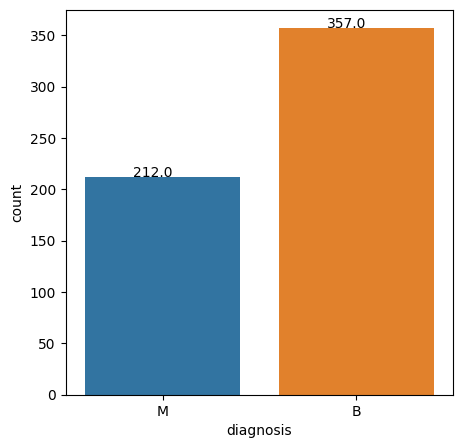

In [3]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x=df['diagnosis'])
for p in ax.patches:
       ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.savefig('count_plot.jpg')
plt.show()

* There is not that much imbalance in this dataset

In [8]:
#selecting only numerical features
num_feat = df.select_dtypes(include=['float64', 'int64']).columns
num_feat

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

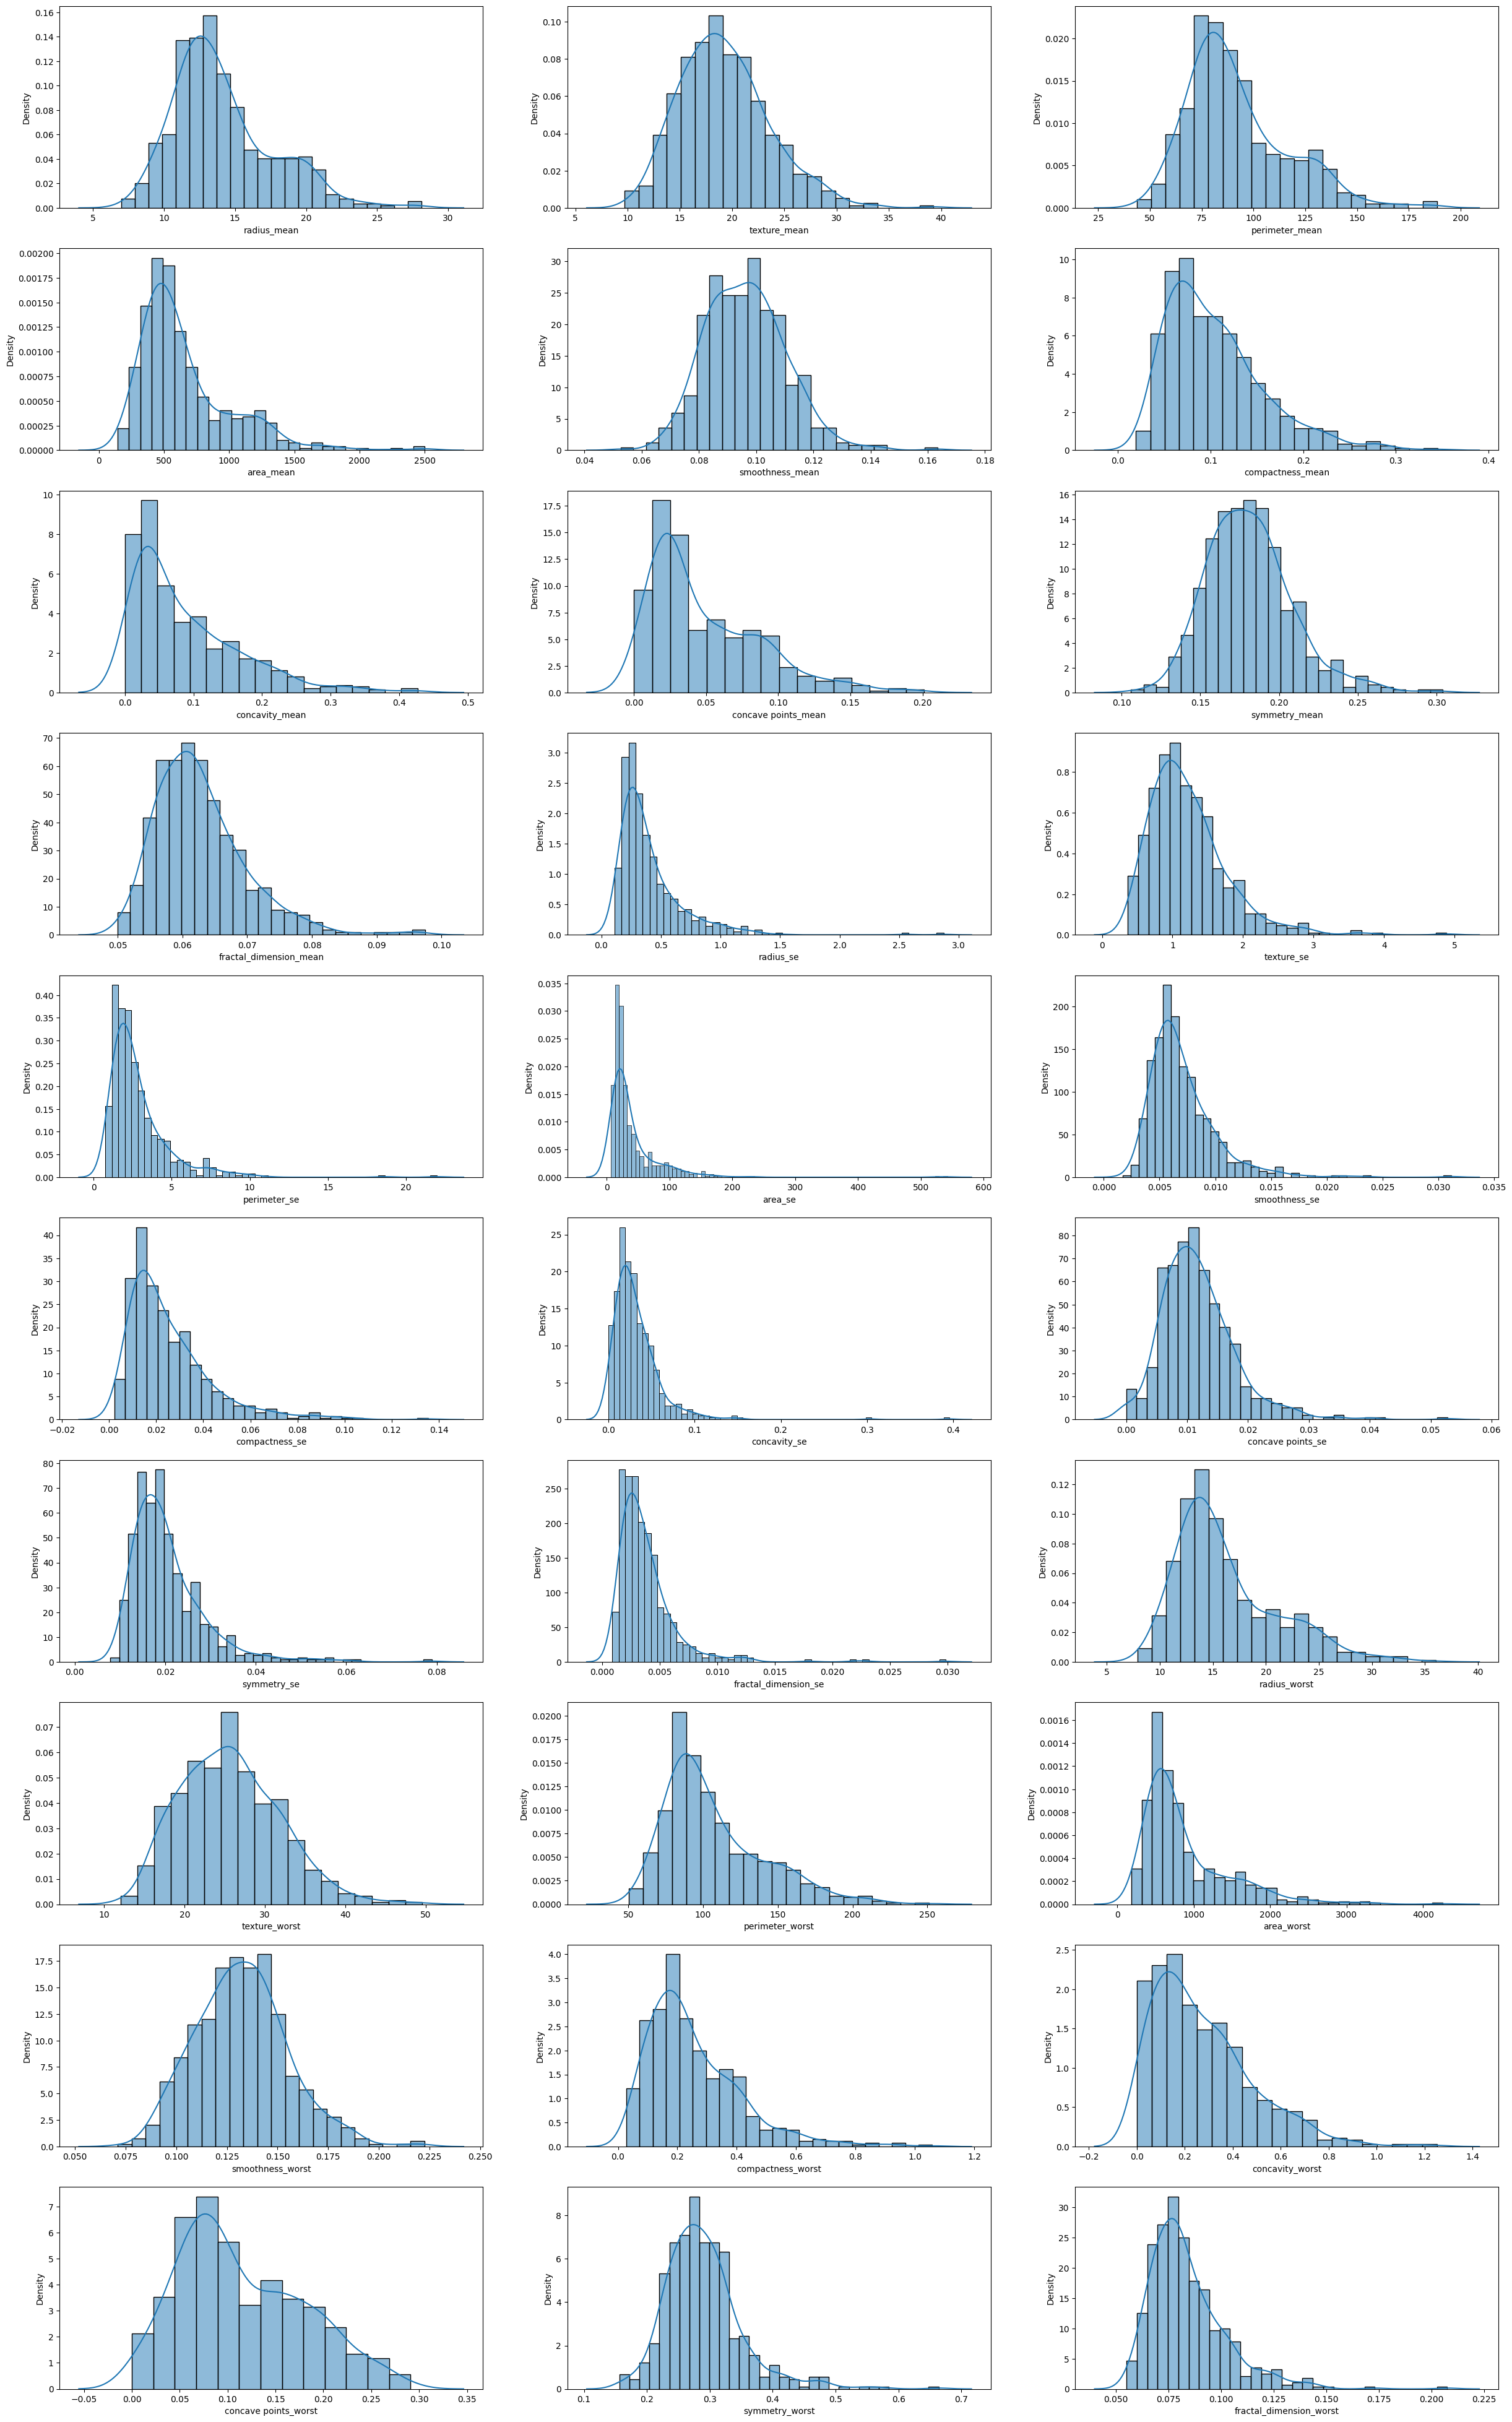

In [9]:
#plotting distributions of numerical features
plt.figure(figsize=(30,50))

for i, col in enumerate(num_feat, 1):
    plt.subplot(10, 3, i)
    sns.histplot(df[col], kde=True, stat="density", kde_kws=dict(cut=3))

* Features 'radius_mean', 'texture_mean', 'perimeter_mean', 'smoothness_mean', 'symmetry_mean', 'texture_worst' and 'smoothness_worst', follow normal distribution.
* Other features follows right skewed distribution.
* Most of the features has outliers

<AxesSubplot: >

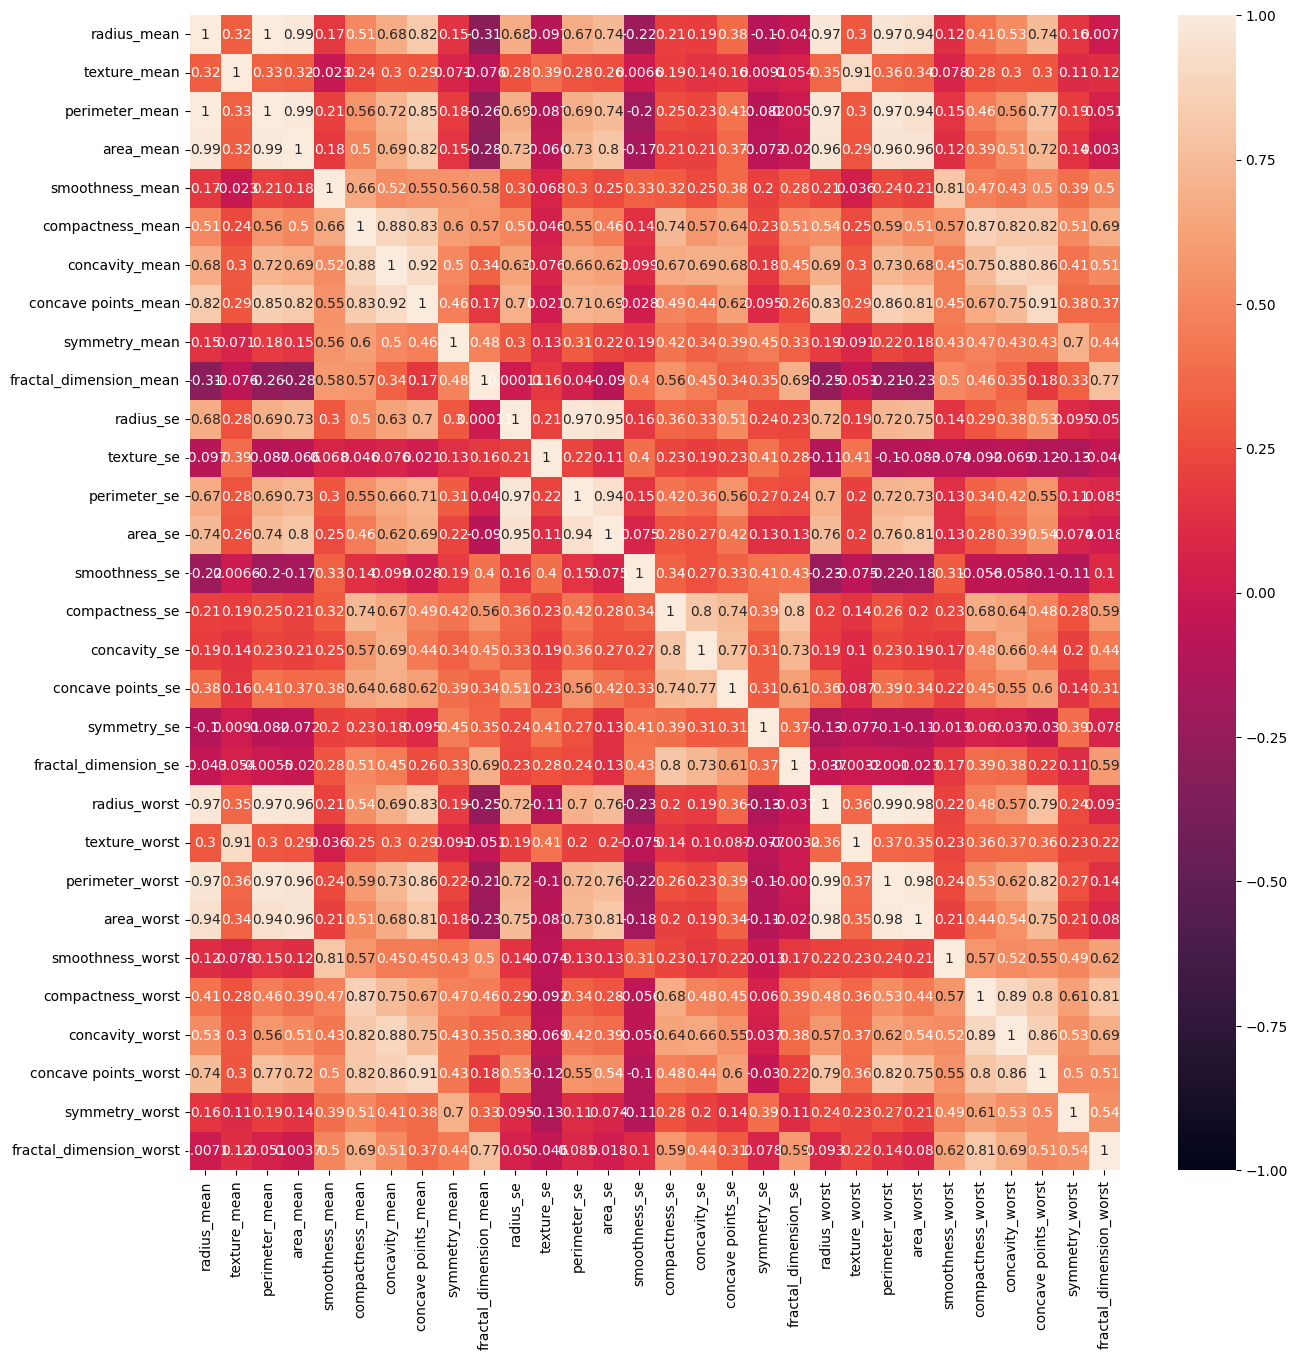

In [10]:
#correlation heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, vmax=1, vmin=-1)

* There are multicollinearity in this dataset. Several features show strong posistive correlation.

In [11]:
#finding correlated features

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [12]:
correlatd_col = correlation(df, 0.8) #we are setting threshold as 0.8

print('Features showing multicollinearity : ')
correlatd_col

Features showing multicollinearity : 


{'area_mean',
 'area_se',
 'area_worst',
 'compactness_worst',
 'concave points_mean',
 'concave points_worst',
 'concavity_mean',
 'concavity_se',
 'concavity_worst',
 'fractal_dimension_se',
 'fractal_dimension_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'smoothness_worst',
 'texture_worst'}

### Data Preprocessing

In [13]:
#making copy of dataframe for preprocessing
data = df.copy()

##### Handling null values

In [14]:
#checking for null values
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

* There are no null values in the dataset

##### Handling duplicated observations

In [15]:
#checking for duplicated observations
data.duplicated().sum()

0

* There are no duplicate observations

##### Dealing Multicollinearity 

In [16]:
#removig columns with multicollinearity

data = data.drop(correlatd_col, axis=1)
data.shape

(569, 14)

* We have removed 17 columns that showed multicollinearity

##### Encoding categorical variable 

In [17]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [18]:
#doing one-hot encoding

data['diagnosis'] = pd.get_dummies(data.diagnosis, drop_first=True)
data.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,symmetry_worst
0,1,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.01587,0.03003,0.4601
1,1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01340,0.01389,0.2750
2,1,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02058,0.02250,0.3613
3,1,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.01867,0.05963,0.6638
4,1,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01885,0.01756,0.2364


In [19]:
data['diagnosis'].unique()

array([1, 0], dtype=uint8)

* 1 represents Malignant
* 0 represents Benign

##### Seperating features and matrix

In [20]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

##### Splitting dataset into test and train set

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [22]:
print('Shape of Train set: ', X_train.shape)
print('Shape of Test set: ', X_test.shape)

Shape of Train set:  (455, 13)
Shape of Test set:  (114, 13)


* There are 455 observations in test set and 114 observations in train set

In [23]:
X_train.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,symmetry_worst
560,14.05,27.15,0.09929,0.11260,0.1537,0.06171,0.3645,1.4920,0.007256,0.026780,0.016260,0.02080,0.2250
428,11.13,16.62,0.08151,0.03834,0.1511,0.06148,0.1415,0.9671,0.005883,0.006263,0.006189,0.02009,0.2383
198,19.18,22.49,0.08523,0.14280,0.1767,0.05529,0.4357,1.0730,0.005524,0.036980,0.012210,0.01415,0.3193
203,13.81,23.75,0.13230,0.17680,0.2251,0.07421,0.5648,1.9300,0.008824,0.031080,0.012910,0.01998,0.4432
41,10.95,21.35,0.12270,0.12180,0.1895,0.06870,0.2366,1.4280,0.008064,0.017640,0.010370,0.01357,0.2964


##### Feature scaling 

In [24]:
#standardizing the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
X_train

array([[-0.01330339,  1.7757658 ,  0.22879041, ...,  0.79264996,
         0.03869712, -1.08014517],
       [-0.8448276 , -0.6284278 , -1.01982093, ..., -0.92858668,
        -0.04989848, -0.85773964],
       [ 1.44755936,  0.71180168, -0.75858166, ...,  0.10046365,
        -0.7911067 ,  0.4967602 ],
       ...,
       [-0.46608541, -1.49375484, -1.56687843, ..., -0.63701388,
         1.02323128, -1.02997851],
       [-0.50025764, -1.62161319, -0.42149874, ..., -1.00532536,
        -1.14798474,  0.35796577],
       [ 0.96060511,  1.21181916,  0.62275607, ...,  0.69523115,
        -1.12801953, -1.23064515]])

* Now the dataset is standardized (mean = 0 and standard deviation = 1).

## Building Machine Learning Models

### 1. Logistic regression

#### Model training

In [26]:
#instantiating the model
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression(random_state=5)

#training the model with train set
logReg.fit(X_train, y_train)

LogisticRegression(random_state=5)

#### Model evaluation

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#prediction for test data
y_pred = logReg.predict(X_test)


#evaluting the model
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [28]:
#storing evaluation metrics to a dataframe

results = pd.DataFrame([['Logistic Regression', acc, pre, rec, f1]],
                       columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.947368,0.933333,0.933333,0.933333


* With default parameters Model is giving accuracy of 94.7%

In [29]:
#printing confusion matrix
confusion_matrix(y_test, y_pred)

array([[66,  3],
       [ 3, 42]], dtype=int64)

* There are 108 correct predictions (66 TP and 42 TN)
* 6 predictions are wrong (3 FP and 3 FN)

#### Cross validation

In [30]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=logReg, X=X_train, y=y_train, cv=10)

print('Accuracy is {:.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation is {:.2f} %'.format(accuracies.std()*100))

Accuracy is 95.84 %
Standard Deviation is 2.28 %


* Our model has accuracy with in the cross validation score

### 2. Random Forest Classifier

#### Model Training 

In [31]:
#instantiating the model
from sklearn.ensemble import RandomForestClassifier

ranForest = RandomForestClassifier(random_state=5)

#training the model
ranForest.fit(X_train, y_train)

RandomForestClassifier(random_state=5)

In [32]:
#model prediction with test data
y_pred = ranForest.predict(X_test)

#### Model Evaluation 

In [33]:
#evaluting the model
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [34]:
#storing evaluation metrics to a dataframe

rf_results = pd.DataFrame([['Random Forest Classifier', acc, pre, rec, f1]],
                       columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(rf_results, ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.947368,0.933333,0.933333,0.933333
1,Random Forest Classifier,0.929825,0.911111,0.911111,0.911111


* Random Forest Classifier has lower scores than Logistic regression

In [35]:
#printing confusion matrix
confusion_matrix(y_test, y_pred)

array([[65,  4],
       [ 4, 41]], dtype=int64)

* Random Forest Classifier made 106 correct and 8 wrong predictions

### Cross Validation

In [36]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=ranForest, X=X_train, y=y_train, cv=10)

print('Accuracy is {:.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation is {:.2f} %'.format(accuracies.std()*100))

Accuracy is 94.28 %
Standard Deviation is 3.01 %


* Random Forest has lower accuracy and higher standard deviaion.
* Since Logistic regression has better performance we will take it as the final model and tune it for better performance.

### Hyperparameter Tuning

In [37]:
#specifying differnet hyperparameters for random search cross validation
from sklearn.model_selection import RandomizedSearchCV

params = {'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'C': [0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2],
         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [38]:
random_search = RandomizedSearchCV(estimator=logReg, param_distributions=params, cv=10, n_jobs=-1, scoring='roc_auc', verbose=3, random_state=5)
random_search.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=LogisticRegression(random_state=5),
                   n_jobs=-1,
                   param_distributions={'C': [0.1, 0.25, 0.5, 0.75, 1, 1.25,
                                              1.5, 1.75, 2],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=5, scoring='roc_auc', verbose=3)

In [39]:
#finding the best estimator
random_search.best_estimator_

LogisticRegression(C=1.5, penalty='none', random_state=5, solver='saga')

In [40]:
#finding best score
random_search.best_score_

0.9915658504781224

In [41]:
#finding best params
random_search.best_params_

{'solver': 'saga', 'penalty': 'none', 'C': 1.5}

* We got the best params value as optimization algorithm = saga, norm of the penalty = None and regularization parameter C = 1.5

## Final Model 

In [42]:
#training the model with best hyperparameters

classifier = LogisticRegression(solver='sag', penalty=None, C=1.5)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.5, penalty=None, solver='sag')

In [43]:
#making predictions with test data
y_pred = classifier.predict(X_test)

### Model evaluation

In [44]:
#calculating evaluation metrics
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

#storing evaluation metrics to a dataframe

lg_results = pd.DataFrame([['Tuned Logistic Regression', acc, pre, rec, f1]],
                       columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(lg_results, ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.947368,0.933333,0.933333,0.933333
1,Random Forest Classifier,0.929825,0.911111,0.911111,0.911111
2,Tuned Logistic Regression,0.947368,0.914894,0.955556,0.934783


* The tuned model has same accuracy as default logistic regression while there is a decrease in precision score. There are improvement in Recall and F1 score

In [45]:
#printing confusion matrix
confusion_matrix(y_test, y_pred)

array([[65,  4],
       [ 2, 43]], dtype=int64)

* The model predicted 108 correct prediction while 8 were wrong
* Two predictions are False Positive while 4 are False Negative

## Making a Sample Prediction

**Sample Observations are:**

radius_mean = 11.13, texture_mean = 16.62, smoothness_mean = 0.08151, compactness_mean = 0.03834, symmetry_mean = 0.1511, fractal_dimension_mean = 0.06148, radius_se = 0.1415, texture_se = 0.9671, smoothness_se = 0.005883, compactness_se = 0.006263, concave points_se = 0.006189, symmetry_se = 0.02009, symmetry_worst = 0.2383

In [69]:
sample_obs = [11.13, 16.62, 0.08151, 0.03834, 0.1511, 0.06148, 0.1415, 0.9671, 0.005883, 0.006263, 0.006189, 0.02009, 0.2383]

#making prediction
classifier.predict(scaler.transform([sample_obs]))

array([0], dtype=uint8)

* Breast Cancer with the given observations is Benign
* With this information the patient can get correct treatment for the disease.